In [284]:
from tensorflow.keras.applications import VGG19,imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import PIL,urllib

In [285]:
model=VGG19(
    weights="imagenet",
    classifier_activation="softmax",
)

In [286]:
def from_path(path):
    img = image.load_img(path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    img=image.img_to_array(img)
    return(predict(img))

In [287]:
def from_url(url):
    img=np.array(PIL.Image.open(urllib.request.urlopen(url)))
    plt.imshow(img)
    plt.axis('off')
    img=cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
    img=cv2.resize(img,(224,224))
    return(predict(img))


In [288]:
def predict(img):
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    results=imagenet_utils.decode_predictions(features)
    return([(i[1],i[2]) for i in results[0]])

[('web_site', 0.9930561),
 ('monitor', 0.0047656214),
 ('scoreboard', 0.00090934127),
 ('screen', 0.0005156338),
 ('television', 0.00029994902)]

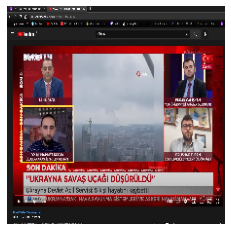

In [294]:
from_path('images/ss1.jpg')